In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
data=pd.read_csv("bodyfat.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [9]:
data.shape

(252, 15)

In [10]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [11]:
data.tail()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [12]:
data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [13]:
data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [14]:
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


<AxesSubplot:xlabel='Abdomen', ylabel='BodyFat'>

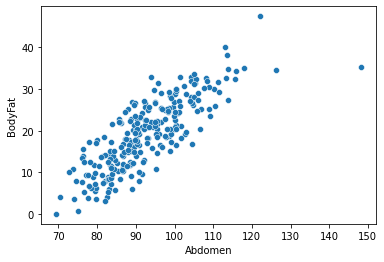

In [15]:
sns.scatterplot(data=data,x='Abdomen',y='BodyFat')

<AxesSubplot:xlabel='Biceps', ylabel='BodyFat'>

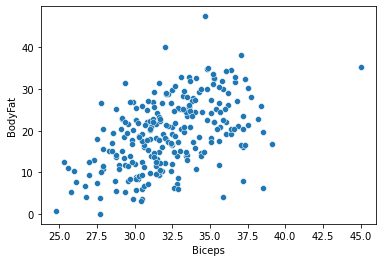

In [16]:
sns.scatterplot(data=data,x='Biceps',y='BodyFat')

<AxesSubplot:xlabel='Chest', ylabel='BodyFat'>

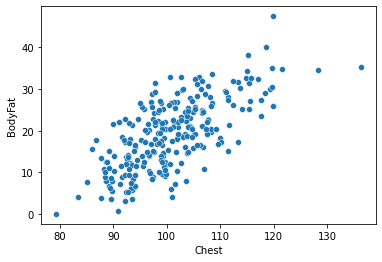

In [17]:
sns.scatterplot(data=data,x='Chest',y='BodyFat')

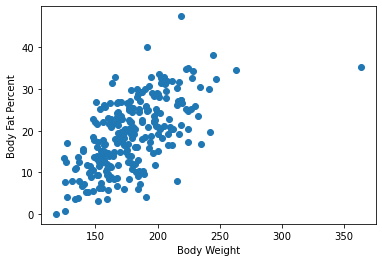

In [18]:
plt.scatter(data["Weight"], data["BodyFat"])
plt.xlabel("Body Weight")
plt.ylabel("Body Fat Percent")
plt.show()

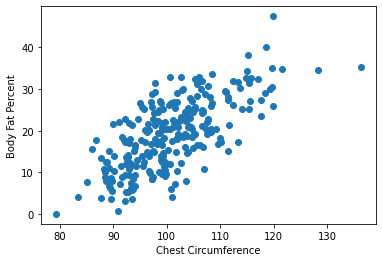

In [19]:
plt.scatter(data["Chest"], data["BodyFat"])
plt.xlabel("Chest Circumference")
plt.ylabel("Body Fat Percent")
plt.show()

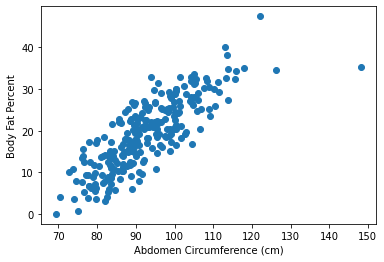

In [20]:
plt.scatter(data["Abdomen"], data["BodyFat"])
plt.xlabel("Abdomen Circumference (cm)")
plt.ylabel("Body Fat Percent")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=data.drop('BodyFat',axis=1)
y=data['BodyFat']

In [23]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape

(201, 14)

In [25]:
x_test.shape

(51, 14)

In [26]:
y_train.shape

(201,)

In [27]:
y_test.shape

(51,)

In [28]:
x_train

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
162,1.0690,33,184.25,68.75,40.7,98.9,92.1,103.5,64.0,37.3,23.5,33.5,30.6,19.7
159,1.0477,31,177.25,71.50,36.2,101.1,92.4,99.3,59.4,39.0,24.6,30.1,28.2,18.2
76,1.0790,57,162.50,69.50,38.7,91.6,78.8,94.3,56.7,39.7,24.2,30.2,29.2,18.1
59,1.0430,61,179.75,65.75,38.4,104.8,98.3,99.6,60.6,37.7,22.9,34.5,29.6,18.5
176,1.0689,37,151.00,67.00,35.3,92.6,83.2,96.4,60.0,38.1,22.0,31.5,26.6,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.0673,55,154.75,71.50,36.9,95.4,86.6,91.8,54.3,35.4,21.5,32.8,27.4,18.7
192,1.0624,42,193.50,70.50,40.7,104.9,94.1,102.7,60.6,38.6,24.7,34.0,30.1,18.7
117,1.0671,51,179.00,72.00,41.0,99.2,90.0,96.4,56.8,38.8,23.3,33.4,29.8,19.5
47,1.0665,39,148.50,71.25,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9


In [29]:
x_test.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
158,1.0704,30,136.50,68.75,35.9,88.7,76.6,89.8,50.1,34.8,21.8,27.0,34.9,16.9
83,1.0377,70,170.75,70.00,38.7,101.8,94.9,95.0,56.0,36.5,24.1,31.2,27.3,19.2
170,1.0926,35,152.25,67.75,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7
101,1.0524,48,173.75,72.00,37.0,99.1,92.0,98.3,59.3,38.4,22.4,27.9,26.2,17.0
150,1.0776,26,152.25,69.00,35.4,92.9,77.6,93.5,56.9,35.9,20.4,31.6,29.0,17.8


In [30]:
y_train

162    13.0
159    22.5
76      8.8
59     24.6
176    13.1
       ... 
67     13.8
192    15.9
117    13.9
47      5.6
172    20.5
Name: BodyFat, Length: 201, dtype: float64

In [31]:
y_test.head()

158    12.5
83     27.0
170     3.0
101    20.4
150     9.4
Name: BodyFat, dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm=LinearRegression()

In [34]:
lm.fit(x_train,y_train)

LinearRegression()

In [35]:
LinearRegression()

LinearRegression()

In [36]:
y_pred=lm.predict(x_test)

In [37]:
y_pred

array([12.47599803, 26.67435388,  3.07959789, 20.63880962,  9.34847798,
       22.70861117, 25.03675869, 25.48102205, 25.93334391, 27.11154051,
       25.57241354, 15.98800692, 21.14640329, 20.83829164, 16.14317929,
       13.3040561 , 16.47678212,  0.78408468, 10.29343046, 11.81382892,
       20.81307832, 14.13571505, 29.36335333, 22.01066502, 19.55707409,
       32.09203249,  4.47080362, 23.01058488, 21.42742996, 28.16462336,
       30.67541777, 26.48394745, 27.80255825, 11.56748784, 35.79295812,
       13.64766366, 24.41298695, 21.21929569, 14.98985644, 11.3621322 ,
       17.7648297 , 20.98358534, 34.97587412, 22.24706119, 20.90945562,
       14.94307209, 13.01198496,  7.40626977, 31.73273885, -4.41584369,
        8.95893169])

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
mean_squared_error(y_test,y_pred)

0.5762546808927957

In [40]:
mean_absolute_error(y_test,y_pred)

0.4329081176906343

In [41]:
r2_score(y_test,y_pred)

0.9920322045008589

In [42]:
lm.score(x,y)

0.9779237884786411